Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data

In [1]:
!pip install scipy

Installation of libraries and dataset

In [40]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats 
import numpy as np

df = apple_data = pd.read_csv("Apple Stock Prices (1981 to 2023).csv")

In [47]:
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Apple Stock prices analysis (1981 to 2023)

To be noted, there are no null values.
Date format is Datetime: no conversion is necessary.

In [28]:
pd.read_csv("Apple Stock Prices (1981 to 2023).csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200
...,...,...,...,...,...,...,...
10603,23/01/2023,138.119995,143.320007,137.899994,141.110001,141.110001,81760300
10604,24/01/2023,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
10605,25/01/2023,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
10606,26/01/2023,143.169998,144.250000,141.899994,143.960007,143.960007,54105100


This analysis concerns Apple stock prices from 1981 to 2023.
Analysis is based on a dataset that comprises columns for date, stock prices (Open, High, Low, Close, Adj close - for adjusted closing stock price), and Volume.

In [48]:
df.set_index('Date', inplace=True)

In [49]:
print(pd.read_csv("Apple Stock Prices (1981 to 2023).csv"))

             Date        Open        High         Low       Close   Adj Close  \
0      02/01/1981    0.154018    0.155134    0.154018    0.154018    0.119849   
1      05/01/1981    0.151228    0.151228    0.150670    0.150670    0.117244   
2      06/01/1981    0.144531    0.144531    0.143973    0.143973    0.112032   
3      07/01/1981    0.138393    0.138393    0.137835    0.137835    0.107256   
4      08/01/1981    0.135603    0.135603    0.135045    0.135045    0.105085   
...           ...         ...         ...         ...         ...         ...   
10603  23/01/2023  138.119995  143.320007  137.899994  141.110001  141.110001   
10604  24/01/2023  140.309998  143.160004  140.300003  142.529999  142.529999   
10605  25/01/2023  140.889999  142.429993  138.809998  141.860001  141.860001   
10606  26/01/2023  143.169998  144.250000  141.899994  143.960007  143.960007   
10607  27/01/2023  143.160004  147.229996  143.080002  145.929993  145.929993   

         Volume  
0      21

To analyze the evolution over time (1981–2023) of the time series properties of Apple’s stock price, you need to focus on how key statistical and structural properties (like trend, volatility, seasonality, etc.) changed over the years.

Data visualization

In [5]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats 
import numpy as np

df = apple_data = pd.read_csv("Apple Stock Prices (1981 to 2023).csv")

import matplotlib.pyplot as plt

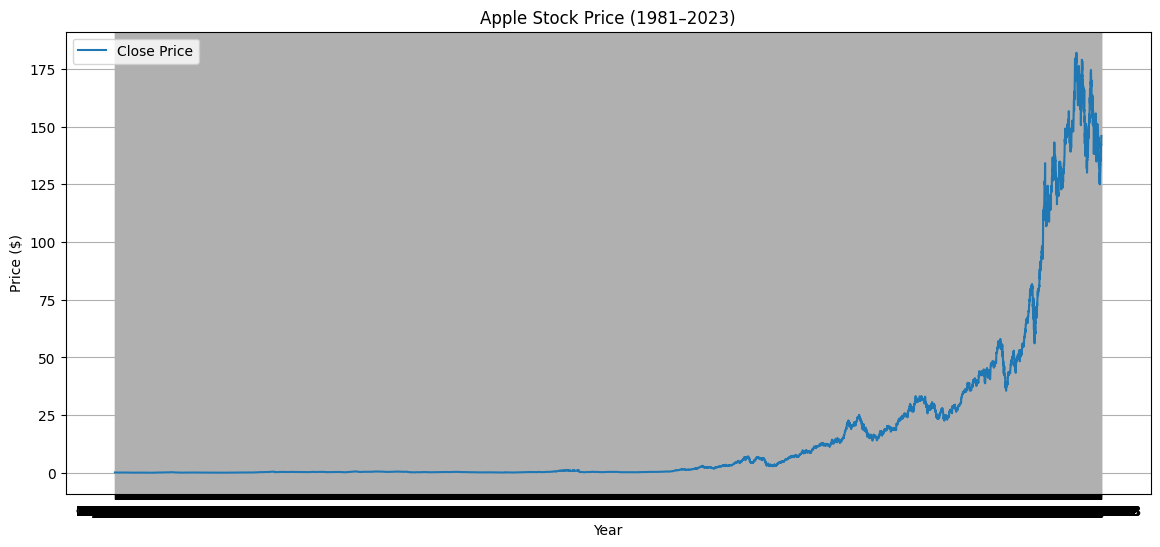

In [6]:
#Trend Over Time

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Apple Stock Price (1981–2023)")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.show()

#Overall increase (bullish trend), long flat periods, or abrupt drops (e.g., 2008 crisis, 2020 COVID shock).

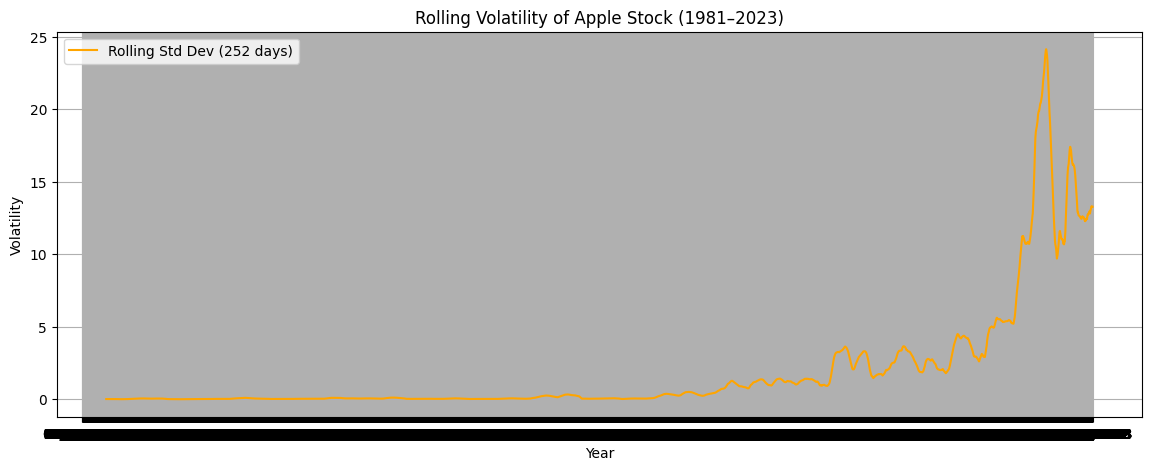

In [7]:
#Volatility Evolution (Rolling Std Deviation)

# Rolling standard deviation over 1 year (252 trading days)
df['Rolling_STD'] = df['Close'].rolling(window=252).std()

plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Rolling_STD'], color='orange', label='Rolling Std Dev (252 days)')
plt.title("Rolling Volatility of Apple Stock (1981–2023)")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.show()

#Rising volatility may reflect periods of market stress or uncertainty.

In [8]:
mean_price = df['Close'].mean()
median_price = df['Close'].median()
std_price = df['Close'].std()

print(f"Mean Close Price: ${mean_price:.2f}")
print(f"Median Close Price: ${median_price:.2f}")
print(f"Standard Deviation: ${std_price:.2f}")

Mean Close Price: $16.70
Median Close Price: $0.49
Standard Deviation: $35.47


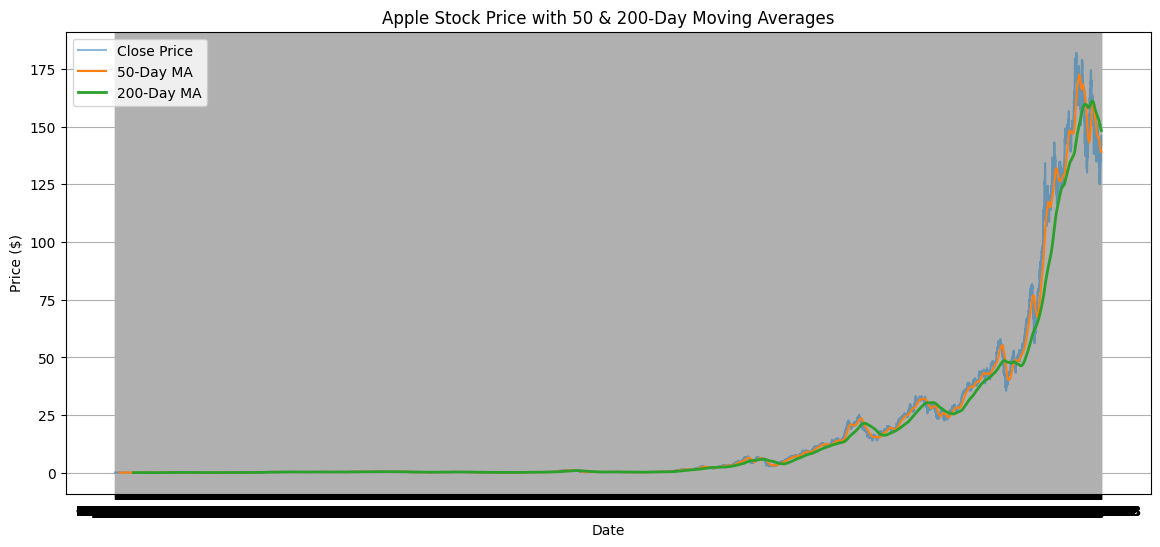

In [11]:
#Moving Average of Closing Prices - over a period of 
#50-day and 200-day moving average (commonly used in stock analysis):

df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', linewidth=1.5)
plt.plot(df['Date'], df['MA_200'], label='200-Day MA', linewidth=2)
plt.title("Apple Stock Price with 50 & 200-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

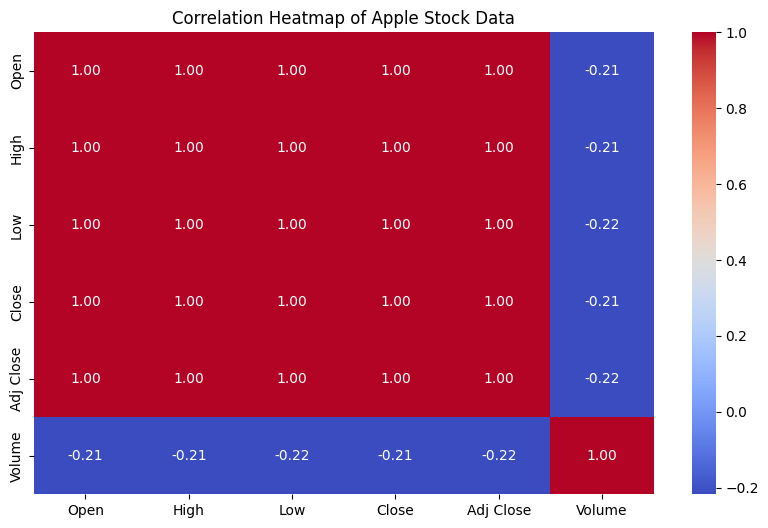

In [54]:
#Correlation Heatmap
#This helps visualize relationships between columns like Open, Close, High, Low, and Volume.


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Apple Stock Data")
plt.show()

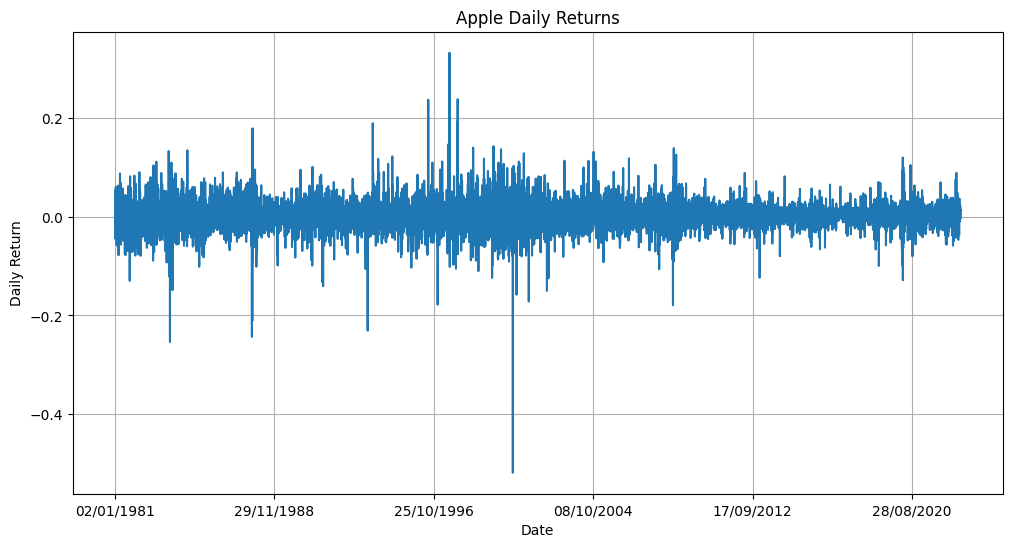

In [55]:
#Calculate and Plot Daily Returns
#This shows how much the stock price changes each day (as a percentage).

# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
df['Daily Return'].plot(title="Apple Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

Summary: Regarding Key Time Series Properties of Apple stock (1981–2023), the following conclusions can be inferred from the data analysis above:
Trend - a strong upward trend has been noticed, especially after 2000
Volatility - is Higher during major financial events (e.g. 2008, 2020)
Seasonality	- May show repeating patterns, e.g., growth at year-end
Stationarity - over time, change is likely to be non-stationary — mean value and variance can be observed too.